Loaded /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/amos22_mri/imagesTr/amos_0540.nii.gz
Shape: (192, 192, 100)
Voxel size: (1.953125, 1.953125, 2.0)


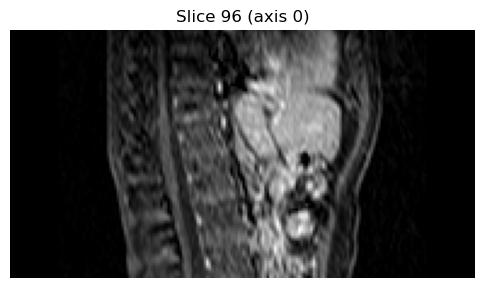

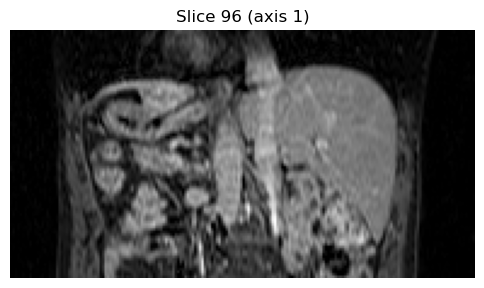

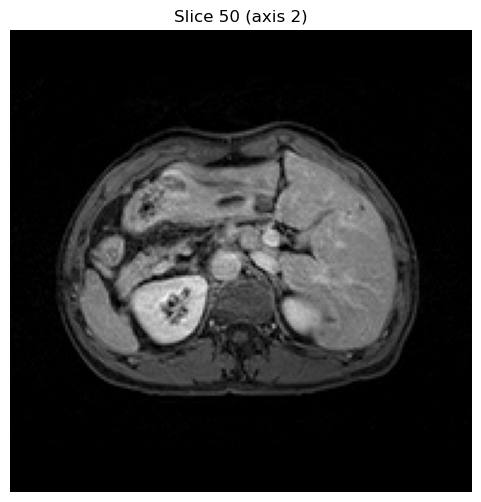

In [6]:
# Cell 1: Install dependencies if not already installed
# (Uncomment if needed)
# !pip install nibabel matplotlib

# Cell 2: Import libraries
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# Cell 3: Define a function to load a NIfTI file
def load_nifti(file_path):
    nii_img = nib.load(file_path)
    data = nii_img.get_fdata()
    header = nii_img.header
    print(f"Loaded {file_path}")
    print(f"Shape: {data.shape}")
    print(f"Voxel size: {header.get_zooms()}")
    return data, header


# Cell 4: Define a function to visualize a slice
def show_slice(image, slice_index, axis=0, header=None, cmap='gray'):
    if axis == 0:
        slice_2d = image[slice_index, :, :]
        spacing = (header.get_zooms()[1], header.get_zooms()[2])  # (Y, Z)
    elif axis == 1:
        slice_2d = image[:, slice_index, :]
        spacing = (header.get_zooms()[0], header.get_zooms()[2])  # (X, Z)
    elif axis == 2:
        slice_2d = image[:, :, slice_index]
        spacing = (header.get_zooms()[0], header.get_zooms()[1])  # (X, Y)
    else:
        raise ValueError("Axis must be 0, 1, or 2.")

    aspect = spacing[1] / spacing[0]  # height/width

    plt.figure(figsize=(6,6))
    plt.imshow(np.rot90(slice_2d), cmap=cmap, aspect=aspect)
    plt.title(f"Slice {slice_index} (axis {axis})")
    plt.axis('off')
    plt.show()

# Cell 5: Specify the path to your AMOS dataset
# For example: "/path/to/AMOS/Training/imagesTr/case001.nii.gz"
image_path = "/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/amos22_mri/imagesTr/amos_0540.nii.gz"  # Change this to your file path

# Cell 6: Load the NIfTI image
image_data, image_header = load_nifti(image_path)

mid_x = image_data.shape[0] // 2
mid_y = image_data.shape[1] // 2
mid_z = image_data.shape[2] // 2

show_slice(image_data, mid_x, axis=0, header=image_header)
show_slice(image_data, mid_y, axis=1, header=image_header)
show_slice(image_data, mid_z, axis=2, header=image_header)

Loaded /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/amos22/labelsTr/amos_0540.nii.gz
Shape: (192, 192, 100)
Voxel size: (1.953125, 1.953125, 2.0)


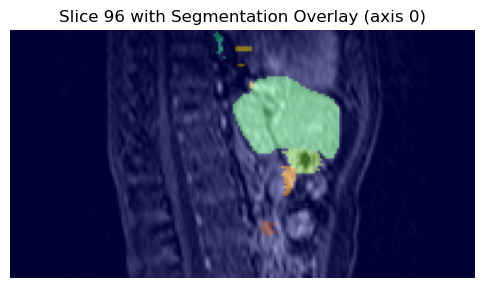

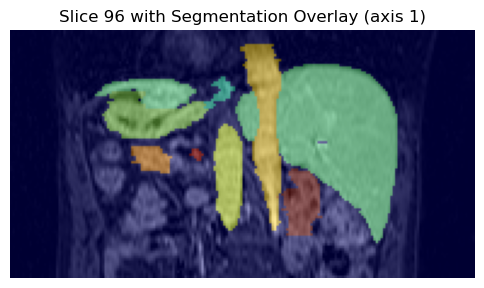

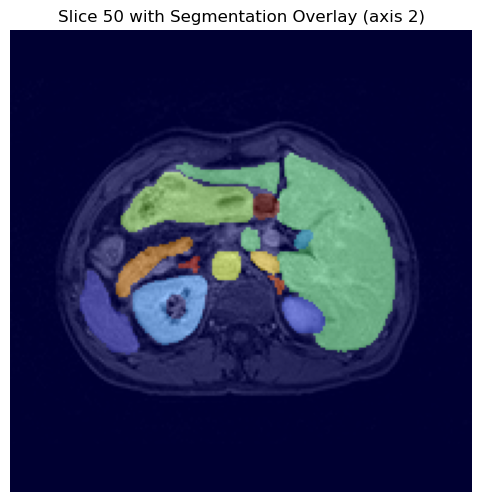

In [7]:
# Cell 8: Load the segmentation mask
mask_path = "/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/amos22/labelsTr/amos_0540.nii.gz"  # Adjust this path
mask_data, mask_header = load_nifti(mask_path)

# Cell 9: Overlay segmentation on top of the image
def overlay_slice(image, mask, slice_index, axis=0, header=None, alpha=0.3):
    if axis == 0:
        img_slice = image[slice_index, :, :]
        mask_slice = mask[slice_index, :, :]
        spacing = (header.get_zooms()[1], header.get_zooms()[2])  # (Y, Z)
    elif axis == 1:
        img_slice = image[:, slice_index, :]
        mask_slice = mask[:, slice_index, :]
        spacing = (header.get_zooms()[0], header.get_zooms()[2])  # (X, Z)
    elif axis == 2:
        img_slice = image[:, :, slice_index]
        mask_slice = mask[:, :, slice_index]
        spacing = (header.get_zooms()[0], header.get_zooms()[1])  # (X, Y)
    else:
        raise ValueError("Axis must be 0, 1, or 2.")

    aspect = spacing[1] / spacing[0]  # height/width

    plt.figure(figsize=(6,6))
    plt.imshow(np.rot90(img_slice), cmap='gray', aspect=aspect)
    plt.imshow(np.rot90(mask_slice), cmap='jet', alpha=alpha, aspect=aspect)
    plt.title(f"Slice {slice_index} with Segmentation Overlay (axis {axis})")
    plt.axis('off')
    plt.show()

# Cell 10: Visualize overlay in the middle slice
overlay_slice(image_data, mask_data, mid_x, axis=0, header=image_header, alpha=0.4)
overlay_slice(image_data, mask_data, mid_y, axis=1, header=image_header, alpha=0.4)
overlay_slice(image_data, mask_data, mid_z, axis=2, header=image_header, alpha=0.4)

# 🩺 AMOS Visualization

This notebook provides interactive visualization tools for exploring the AMOS dataset, including MRI images and corresponding segmentation masks.

## 📌 Features
- Interactive slice viewers for sagittal, coronal, and axial planes.
- Overlays of segmentation masks with adjustable transparency.
- Navigation between multiple subjects in the dataset.
- Voxel spacing-adjusted aspect ratios for correct anatomical proportions.

## 🔍 Dataset
- **Source**: AMOS challenge dataset (AMOS22).
- **Modality**: MRI (filtered from AMOS dataset).
- **Structure**: imagesTr and labelsTr folders contain NIfTI files (`.nii.gz`).

---

_Use the interactive widgets below to explore the dataset slice-by-slice and subject-by-subject._


In [ ]:
# Cell 1: Install dependencies if not already installed
# (Uncomment if needed)
# !pip install nibabel matplotlib ipywidgets

# Cell 2: Import libraries
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import ipywidgets as widgets
from IPython.display import display

# Cell 3: Define a function to load a NIfTI file
def load_nifti(file_path):
    nii_img = nib.load(file_path)
    data = nii_img.get_fdata()
    header = nii_img.header
    return data, header

# Cell 4: Define the interactive dataset viewer
def dataset_viewer(images_dir, labels_dir=None, alpha=0.3):
    # List all image files
    image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.nii.gz')])
    num_images = len(image_files)

    # Function to update display
    def view_image(image_index, slice_index_0, slice_index_1, slice_index_2):
        filename = image_files[image_index]
        image_path = os.path.join(images_dir, filename)
        image_data, image_header = load_nifti(image_path)

        # Print header info automatically
        print("="*40)
        print(f"Header Info - File: {filename}")
        print(f"Shape: {image_data.shape}")
        print(f"Pixel Spacing (X, Y, Z): {image_header.get_zooms()}")
        print(f"Affine:\n{nib.load(image_path).affine}")
        print("="*40)

        # Load mask if available
        mask_data = None
        if labels_dir:
            label_path = os.path.join(labels_dir, filename)
            if os.path.exists(label_path):
                mask_data, _ = load_nifti(label_path)

        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        axes_titles = ['Sagittal (axis 0)', 'Coronal (axis 1)', 'Axial (axis 2)']
        slice_indices = [slice_index_0, slice_index_1, slice_index_2]
        axes_order = [(1,2), (0,2), (0,1)]  # spacing orders for each view

        for idx, ax in enumerate(axes):
            axis = idx
            if axis == 0:
                img_slice = image_data[slice_index_0, :, :]
                spacing = (image_header.get_zooms()[1], image_header.get_zooms()[2])
                mask_slice = mask_data[slice_index_0, :, :] if mask_data is not None else None
            elif axis == 1:
                img_slice = image_data[:, slice_index_1, :]
                spacing = (image_header.get_zooms()[0], image_header.get_zooms()[2])
                mask_slice = mask_data[:, slice_index_1, :] if mask_data is not None else None
            elif axis == 2:
                img_slice = image_data[:, :, slice_index_2]
                spacing = (image_header.get_zooms()[0], image_header.get_zooms()[1])
                mask_slice = mask_data[:, :, slice_index_2] if mask_data is not None else None

            aspect = spacing[1] / spacing[0]
            ax.imshow(np.rot90(img_slice), cmap='gray', aspect=aspect)
            if mask_slice is not None:
                ax.imshow(np.rot90(mask_slice), cmap='jet', alpha=alpha, aspect=aspect)
            ax.set_title(f"{axes_titles[idx]} - Slice {slice_indices[idx]}")
            ax.axis('off')

        plt.suptitle(f"File: {filename}")
        plt.show()

    # Widgets
    image_slider = widgets.IntSlider(min=0, max=num_images-1, step=1, description='Image')

    # Dummy initial shape to get slider ranges
    dummy_image, _ = load_nifti(os.path.join(images_dir, image_files[0]))
    slice_slider_0 = widgets.IntSlider(min=0, max=dummy_image.shape[0]-1, step=1, value=dummy_image.shape[0]//2, description='Sagittal')
    slice_slider_1 = widgets.IntSlider(min=0, max=dummy_image.shape[1]-1, step=1, value=dummy_image.shape[1]//2, description='Coronal')
    slice_slider_2 = widgets.IntSlider(min=0, max=dummy_image.shape[2]-1, step=1, value=dummy_image.shape[2]//2, description='Axial')

    # Update slice slider ranges when image changes
    def update_slice_sliders(*args):
        filename = image_files[image_slider.value]
        image_path = os.path.join(images_dir, filename)
        image_data, _ = load_nifti(image_path)
        slice_slider_0.max = image_data.shape[0] - 1
        slice_slider_1.max = image_data.shape[1] - 1
        slice_slider_2.max = image_data.shape[2] - 1
        slice_slider_0.value = image_data.shape[0] // 2
        slice_slider_1.value = image_data.shape[1] // 2
        slice_slider_2.value = image_data.shape[2] // 2

    image_slider.observe(update_slice_sliders, names='value')
    update_slice_sliders()  # initialize sliders

    # Display interactive widgets
    ui = widgets.VBox([image_slider, slice_slider_0, slice_slider_1, slice_slider_2])
    out = widgets.interactive_output(
        view_image, 
        {
            'image_index': image_slider, 
            'slice_index_0': slice_slider_0,
            'slice_index_1': slice_slider_1,
            'slice_index_2': slice_slider_2
        }
    )
    display(ui, out)

# Cell 5: Specify your directories and call the viewer
images_dir = "/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/amos22_mri/imagesTr/"
labels_dir = "/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/amos22_mri/labelsTr/"

# Cell 6: Launch the viewer
dataset_viewer(images_dir, labels_dir, alpha=0.4)


Output()

In [20]:
import SimpleITK as sitk
import os
import numpy as np
from PIL import Image

# Base paths
base_dir = '/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/Train_Sets/MR/'
output_base_dir = '/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/NIfTI/MR/'

# Separate output directories for images and labels
images_output_dir = os.path.join(output_base_dir, 'images')
labels_output_dir = os.path.join(output_base_dir, 'labels')
os.makedirs(images_output_dir, exist_ok=True)
os.makedirs(labels_output_dir, exist_ok=True)

# Helper function: Convert DICOM to NIfTI
def convert_series(input_dir, output_file):
    reader = sitk.ImageSeriesReader()
    dicom_series = reader.GetGDCMSeriesFileNames(input_dir)
    if not dicom_series:
        print(f"⚠️ No DICOMs found in {input_dir}")
        return None
    reader.SetFileNames(dicom_series)
    image = reader.Execute()
    sitk.WriteImage(image, output_file)
    print(f"✅ Converted {input_dir} → {output_file}")
    return image  # Return image to get metadata

# Helper function: Convert Ground PNGs to NIfTI
def convert_ground_pngs(ground_dir, reference_image, output_file):
    if not os.path.exists(ground_dir):
        print(f"⚠️ Ground folder missing: {ground_dir}")
        return

    png_files = sorted(
        [f for f in os.listdir(ground_dir) if f.endswith('.png')],
        key=lambda x: int(os.path.splitext(x)[0].split('-')[-1])
    )

    if not png_files:
        print(f"⚠️ No PNGs found in {ground_dir}")
        return

    slices = []
    for fname in png_files:
        img = Image.open(os.path.join(ground_dir, fname)).convert('L')  # convert to grayscale
        arr = np.array(img)
        arr = (arr > 0).astype(np.uint8)  # Binarize (optional)
        slices.append(arr)

    mask_volume = np.stack(slices, axis=0)  # Shape: (Z,Y,X)
    mask_image = sitk.GetImageFromArray(mask_volume)
    mask_image.CopyInformation(reference_image)

    sitk.WriteImage(mask_image, output_file)
    print(f"✅ Converted {ground_dir} → {output_file}")

# Loop through all patient folders
patient_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

for patient_id in sorted(patient_folders, key=lambda x: int(x)):
    patient_dir = os.path.join(base_dir, patient_id)
    print(f"\n=== Processing Patient {patient_id} ===")

    # T1DUAL InPhase
    t1_in_dir = os.path.join(patient_dir, 'T1DUAL', 'DICOM_anon', 'InPhase')
    t1_in_out = os.path.join(images_output_dir, f"Patient_{patient_id}_T1_IN.nii.gz")
    t1_in_image = convert_series(t1_in_dir, t1_in_out)

    t1_in_ground = os.path.join(patient_dir, 'T1DUAL', 'Ground')
    t1_in_ground_out = os.path.join(labels_output_dir, f"Patient_{patient_id}_T1_IN.nii.gz")
    if t1_in_image:
        convert_ground_pngs(t1_in_ground, t1_in_image, t1_in_ground_out)

    # T2SPIR
    t2_dir = os.path.join(patient_dir, 'T2SPIR', 'DICOM_anon')
    t2_out = os.path.join(images_output_dir, f"Patient_{patient_id}_T2.nii.gz")
    t2_image = convert_series(t2_dir, t2_out)

    t2_ground = os.path.join(patient_dir, 'T2SPIR', 'Ground')
    t2_ground_out = os.path.join(labels_output_dir, f"Patient_{patient_id}_T2.nii.gz")
    if t2_image:
        convert_ground_pngs(t2_ground, t2_image, t2_ground_out)



=== Processing Patient 1 ===
✅ Converted /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/Train_Sets/MR/1/T1DUAL/DICOM_anon/InPhase → /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/NIfTI/MR/images/Patient_1_T1_IN.nii.gz
✅ Converted /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/Train_Sets/MR/1/T1DUAL/Ground → /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/NIfTI/MR/labels/Patient_1_T1_IN.nii.gz
✅ Converted /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/Train_Sets/MR/1/T2SPIR/DICOM_anon → /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/NIfTI/MR/images/Patient_1_T2.nii.gz
✅ Converted /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/Train_Sets/MR/1/T2SPIR/Ground → /Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation

# 🩺 CHAOS Visualization

This notebook provides interactive visualization tools for exploring the CHAOS dataset, including MRI images and corresponding segmentation masks.

## 📌 Features
- Interactive slice viewers for sagittal, coronal, and axial planes.
- Overlays of segmentation masks with adjustable transparency.
- Navigation between multiple subjects in the dataset.
- Voxel spacing-adjusted aspect ratios for correct anatomical proportions.

## 🔍 Dataset
- **Source**: CHAOS challenge dataset (AMOS22).
- **Modality**: MRI
- **Structure**: images and labels folders contain NIfTI files (`.nii.gz`).

---

_Use the interactive widgets below to explore the dataset slice-by-slice and subject-by-subject._


In [ ]:
# Cell 1: Install dependencies if not already installed
# (Uncomment if needed)
# !pip install nibabel matplotlib ipywidgets

# Cell 2: Import libraries
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import ipywidgets as widgets
from IPython.display import display

# Cell 3: Define a function to load a NIfTI file
def load_nifti(file_path):
    nii_img = nib.load(file_path)
    data = nii_img.get_fdata()
    header = nii_img.header
    return data, header

# Cell 4: Define the interactive dataset viewer
def dataset_viewer(images_dir, labels_dir=None, alpha=0.3):
    # List all image files
    image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.nii.gz')])
    num_images = len(image_files)

    # Function to update display
    def view_image(image_index, slice_index_0, slice_index_1, slice_index_2):
        filename = image_files[image_index]
        image_path = os.path.join(images_dir, filename)
        image_data, image_header = load_nifti(image_path)

        # Print header info automatically
        print("="*40)
        print(f"Header Info - File: {filename}")
        print(f"Shape: {image_data.shape}")
        print(f"Pixel Spacing (X, Y, Z): {image_header.get_zooms()}")
        print(f"Affine:\n{nib.load(image_path).affine}")
        print("="*40)

        # Load mask if available
        mask_data = None
        if labels_dir:
            label_path = os.path.join(labels_dir, filename)
            if os.path.exists(label_path):
                mask_data, _ = load_nifti(label_path)

        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        axes_titles = ['Sagittal (axis 0)', 'Coronal (axis 1)', 'Axial (axis 2)']
        slice_indices = [slice_index_0, slice_index_1, slice_index_2]
        axes_order = [(1,2), (0,2), (0,1)]  # spacing orders for each view

        for idx, ax in enumerate(axes):
            axis = idx
            if axis == 0:
                img_slice = image_data[slice_index_0, :, :]
                spacing = (image_header.get_zooms()[1], image_header.get_zooms()[2])
                mask_slice = mask_data[slice_index_0, :, :] if mask_data is not None else None
            elif axis == 1:
                img_slice = image_data[:, slice_index_1, :]
                spacing = (image_header.get_zooms()[0], image_header.get_zooms()[2])
                mask_slice = mask_data[:, slice_index_1, :] if mask_data is not None else None
            elif axis == 2:
                img_slice = image_data[:, :, slice_index_2]
                spacing = (image_header.get_zooms()[0], image_header.get_zooms()[1])
                mask_slice = mask_data[:, :, slice_index_2] if mask_data is not None else None

            aspect = spacing[1] / spacing[0]
            ax.imshow(np.rot90(img_slice), cmap='gray', aspect=aspect)
            if mask_slice is not None:
                ax.imshow(np.rot90(mask_slice), cmap='jet', alpha=alpha, aspect=aspect)
            ax.set_title(f"{axes_titles[idx]} - Slice {slice_indices[idx]}")
            ax.axis('off')

        plt.suptitle(f"File: {filename}")
        plt.show()

    # Widgets
    image_slider = widgets.IntSlider(min=0, max=num_images-1, step=1, description='Image')

    # Dummy initial shape to get slider ranges
    dummy_image, _ = load_nifti(os.path.join(images_dir, image_files[0]))
    slice_slider_0 = widgets.IntSlider(min=0, max=dummy_image.shape[0]-1, step=1, value=dummy_image.shape[0]//2, description='Sagittal')
    slice_slider_1 = widgets.IntSlider(min=0, max=dummy_image.shape[1]-1, step=1, value=dummy_image.shape[1]//2, description='Coronal')
    slice_slider_2 = widgets.IntSlider(min=0, max=dummy_image.shape[2]-1, step=1, value=dummy_image.shape[2]//2, description='Axial')

    # Update slice slider ranges when image changes
    def update_slice_sliders(*args):
        filename = image_files[image_slider.value]
        image_path = os.path.join(images_dir, filename)
        image_data, _ = load_nifti(image_path)
        slice_slider_0.max = image_data.shape[0] - 1
        slice_slider_1.max = image_data.shape[1] - 1
        slice_slider_2.max = image_data.shape[2] - 1
        slice_slider_0.value = image_data.shape[0] // 2
        slice_slider_1.value = image_data.shape[1] // 2
        slice_slider_2.value = image_data.shape[2] // 2

    image_slider.observe(update_slice_sliders, names='value')
    update_slice_sliders()  # initialize sliders

    # Display interactive widgets
    ui = widgets.VBox([image_slider, slice_slider_0, slice_slider_1, slice_slider_2])
    out = widgets.interactive_output(
        view_image, 
        {
            'image_index': image_slider, 
            'slice_index_0': slice_slider_0,
            'slice_index_1': slice_slider_1,
            'slice_index_2': slice_slider_2
        }
    )
    display(ui, out)

# Cell 5: Specify your directories and call the viewer
images_dir = "/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/NIfTI/MR/images"
labels_dir = "/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/NIfTI/MR/labels"

# Cell 6: Launch the viewer
dataset_viewer(images_dir, labels_dir, alpha=0.4)



Output()

Image shape: (35, 256, 256)
Label shape: (35, 256, 256)
Image spacing: (1.89453125, 1.89453125, 5.5)
Label spacing: (1.89453125, 1.89453125, 5.5)
Image direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Label direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


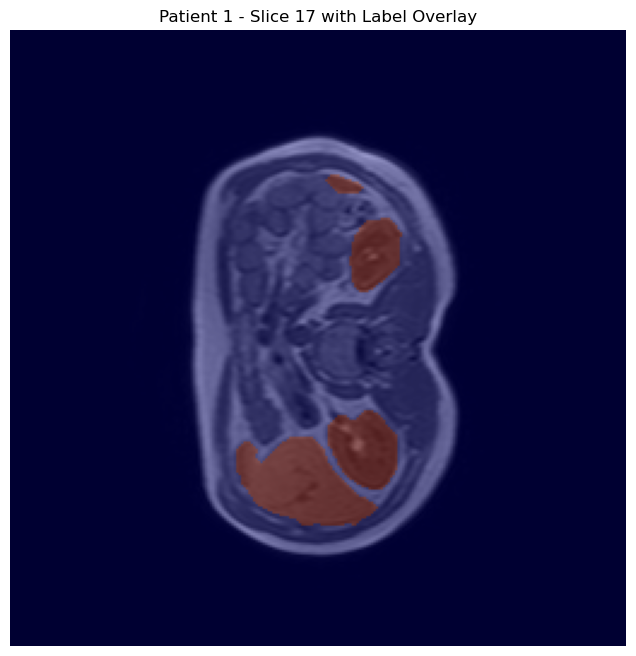

In [18]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os

# Define paths
image_path = '/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/NIfTI/MR/images/Patient_1_T1_IN.nii.gz'
label_path = '/Users/fransiskusbudi/UoE/Dissertation/multimodal_segmentation_project/datasets/chaos/NIfTI/MR/labels/Patient_1_T1_IN_mask.nii.gz'

# Load image and label
image = sitk.ReadImage(image_path)
label = sitk.ReadImage(label_path)

# Check shape and spacing
print(f"Image shape: {sitk.GetArrayFromImage(image).shape}")
print(f"Label shape: {sitk.GetArrayFromImage(label).shape}")
print(f"Image spacing: {image.GetSpacing()}")
print(f"Label spacing: {label.GetSpacing()}")
print(f"Image direction: {image.GetDirection()}")
print(f"Label direction: {label.GetDirection()}")

# Visual check on middle slice
image_data = sitk.GetArrayFromImage(image)  # shape: (Z, Y, X)
label_data = sitk.GetArrayFromImage(label)  # shape: (Z, Y, X)

mid_slice = image_data.shape[0] // 2
img_slice = image_data[mid_slice, :, :]
lbl_slice = label_data[mid_slice, :, :]

plt.figure(figsize=(8,8))
plt.imshow(np.rot90(img_slice), cmap='gray')
plt.imshow(np.rot90(lbl_slice), cmap='jet', alpha=0.4)
plt.title(f"Patient 1 - Slice {mid_slice} with Label Overlay")
plt.axis('off')
plt.show()
